# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.


**_Цель данной работы_** - изучить данные, предоставленные сервисом Яндекс Недвижимость, провести предобработку для удобства их анализа и дальнейшего использования, подтвердить или опровергнуть гипотезы о влиянии различных параметров объявлений на:

- ценообразование квартир в СПБ и прилежащих областях;
- скорость их продажи;
- распределение цены по населённым пунктам.


### Откройте файл с данными и изучите общую информацию.


Импортируем библиотеку pandas и выгружаем данные из файла в переменную **data**:


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("https://code.s3.yandex.net/datasets/real_estate_data.csv", sep="\t")
data.head().T

,0,1,2,3,4
total_images,20,7,10,0,2
last_price,13000000.0,3350000.0,5196000.0,64900000.0,10000000.0
total_area,108.0,40.4,56.0,159.0,100.0
first_day_exposition,2019-03-07T00:00:00,2018-12-04T00:00:00,2015-08-20T00:00:00,2015-07-24T00:00:00,2018-06-19T00:00:00
rooms,3,1,2,3,2
ceiling_height,2.7,NaN,NaN,NaN,3.03
floors_total,16.0,11.0,5.0,14.0,14.0
living_area,51.0,18.6,34.3,NaN,32.0
floor,8,1,4,9,13
is_apartment,NaN,NaN,NaN,NaN,NaN


Общая информация о датафрейме:


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


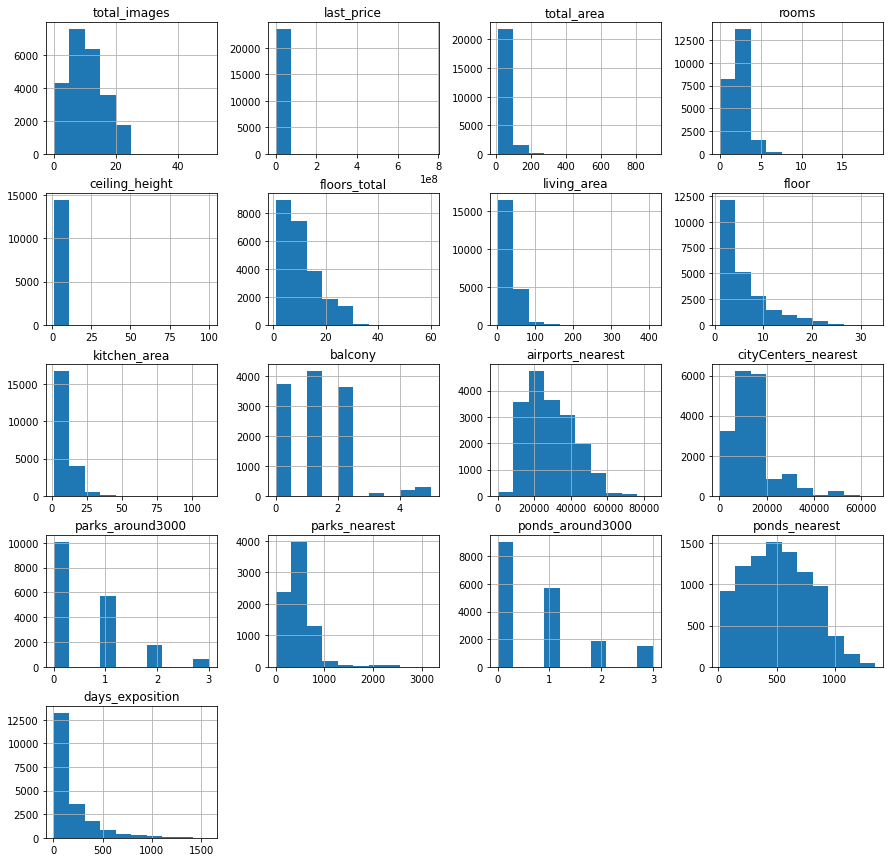

In [5]:
data.hist(figsize=(15, 15))
plt.show()

### Предобработка данных


#### Удаление пропусков


Выведем количество пропущенных в данных значений и отсортируем их в порядке убывания:


In [6]:
data.isna().sum().sort_values(ascending=False)

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
cityCenters_nearest      5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

Среди этих колонок наименьшим количеством пропусков обладает **locality_name**, однако отсутствующие в нём строки заполнить значениями не представляется возможным, поэтому их можно исключить из расчёта. Пропуски в **floors_total** заполнить проблематично, так как в таблице отсутсвуют разбитые на категории параметры, поэтому эти данные на текущем этапе оставим без изменений.


In [7]:
data = data.dropna(subset=["locality_name"]).reset_index(drop=True)

Наибольшим количеством пропусков обладают следующие колонки:

- **is_apartment** - апартаменты, эту колонку с булевыми значениями можно заполнить параметром False, поскольку большинство квартир не являются апартаментами;
- **balcony** - количество балконов, пропущенные значения можно интерпретировать как отсутствие в доме балкона и заполнить их нулями;
- **parks_nearest** - расстояние до ближайшего парка, заполнить проблематично, м;
- **ponds_nearest** - расстояние до ближайшего пруда, заполнить проблематично, м.


In [8]:
data["is_apartment"].fillna(False, inplace=True)

In [9]:
data["balcony"].fillna(0, inplace=True)

Проверим изменённые параметры датафрейма


In [10]:
data.isna().sum().sort_values(ascending=False)

parks_nearest           15586
ponds_nearest           14565
ceiling_height           9160
airports_nearest         5534
cityCenters_nearest      5511
ponds_around3000         5510
parks_around3000         5510
days_exposition          3180
kitchen_area             2269
living_area              1898
floors_total               85
balcony                     0
locality_name               0
total_images                0
last_price                  0
studio                      0
is_apartment                0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

#### Обработка аномальных значений


Среди представленных значений особое внимание следует уделить колонке с высотой потолков, поскольку значение квантиля Q3 составляет 2.8 м, а максимальное значение - 100 м. Объективно говоря, здание в эксплуатации с потолками выше 10 м сложно представить, поэтому имеет место предположение об ошибках в исходных данных. Отследим такие значения, используя **value_counts**.


In [11]:
data.ceiling_height.value_counts().sort_index().tail(20)

5.0      1
5.2      1
5.3      2
5.5      1
5.6      1
5.8      1
6.0      1
8.0      3
8.3      1
10.3     1
14.0     1
20.0     1
22.6     1
24.0     1
25.0     7
26.0     1
27.0     8
27.5     1
32.0     2
100.0    1
Name: ceiling_height, dtype: int64

Последние 10 значений достаточно сильно отличаются от реальных, поэтому уменьшим их на один порядок:


In [12]:
data["ceiling_height"] = data["ceiling_height"].apply(lambda x: x / 10 if x > 11 else x)
data.ceiling_height.value_counts().sort_index()

1.00      1
1.20      1
1.40      1
1.75      1
2.00     12
         ..
6.00      1
8.00      3
8.30      1
10.00     1
10.30     1
Name: ceiling_height, Length: 176, dtype: int64

#### Изменение типов данных


Рассмотрим представленные в таблице типы данных:


In [13]:
data.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

Среди этих категорий колонки **floors_total**, **balcony**, **parks_around3000**, **ponds_around3000**, **days_exposition** желательно привести к целочисленному типу в соответствии с логикой и удобством отображения, однако, поскольку в этих столбцах есть пропущенные значения, то из-за наличия NaN они имеют тип float. Также стоит отметить, что столбец **first_day_exposition** предполагает формат даты, но имеет строковый/строковый+числовой тип. Приведём его в соответствие с помощью функции **to_datetime**.


In [14]:
data["first_day_exposition"] = pd.to_datetime(
    data["first_day_exposition"], format="%Y-%m-%dT%H:%M:%S"
)
data["first_day_exposition"]

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23645   2017-03-21
23646   2018-01-15
23647   2018-02-11
23648   2017-03-28
23649   2017-07-21
Name: first_day_exposition, Length: 23650, dtype: datetime64[ns]

Как видим, тип данных был успешно изменён на datetime64[ns].Теперь приведём в соответствие остальные типы данных.


In [15]:
data = data.astype(
    {
        "balcony": "Int64",
        "ponds_nearest": "Int64",
        "parks_nearest": "Int64",
        "airports_nearest": "Int64",
        "cityCenters_nearest": "Int64",
    },
    errors="ignore",
)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23650 entries, 0 to 23649
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        14490 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           21752 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          21381 non-null  float64       
 13  balcony         

#### Обработка дубликатов


In [17]:
data.duplicated().sum()

0

Явных дубликатов в датафрейме не обнаружено. Единственным оставшимся в нём столбцом со строковым типом данных остаётся **locality_name**, поэтому неявные дубликаты следует искать здесь. Предварительно перед отсевом дубликатов следует привести строки к нижнему регистру и заменить в словах букву _ё_.


In [18]:
len(data.locality_name.unique())

364

In [19]:
data["locality_name"] = data["locality_name"].str.lower().str.replace("ё", "е")
data["locality_name"].unique()

array(['санкт-петербург', 'поселок шушары', 'городской поселок янино-1',
       'поселок парголово', 'поселок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина',
       'деревня федоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'поселок металлострой',
       'поселок городского типа лебяжье',
       'поселок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'поселок аннино',
       'поселок городского типа ефимовский', 'поселок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'поселок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', 'поселок новый свет

In [20]:
len(data.locality_name.unique())

330

Отсеив часть дубликатов, переходим к анализу остальных названий. Среди них можно выделить 10 различных типов населённых пунктов, они перечислены в **locality_name_type**.


In [21]:
locality_name_type = [
    "садоводческое некоммерческое товарищество",
    "поселок при железнодорожной станции",
    "поселок городского типа",
    "садовое товарищество",
    "коттеджный поселок",
    "городской поселок",
    "поселок станции",
    "поселок",
    "деревня",
    "село",
]

Убрать все дубликаты возможно, если удалить все эти типы из названий, а также удалить лишние пробелы, если они будут.


In [22]:
for i in locality_name_type:
    data["locality_name"] = data["locality_name"].str.replace(i, "").str.strip()

In [23]:
for i in data.locality_name.unique():
    print(i)

санкт-петербург
шушары
янино-1
парголово
мурино
ломоносов
сертолово
петергоф
пушкин
кудрово
коммунар
колпино
красный бор
гатчина
федоровское
выборг
кронштадт
кировск
новое девяткино
металлострой
лебяжье
сиверский
молодцово
кузьмоловский
новая ропша
павловск
пикколово
всеволожск
волхов
кингисепп
приозерск
сестрорецк
куттузи
аннино
ефимовский
плодовое
заклинье
торковичи
первомайское
красное
понтонный
сясьстрой
старая
лесколово
новый свет
сланцы
путилово
ивангород
шлиссельбург
никольское
зеленогорск
сосновый бор
оржицы
кальтино
романовка
бугры
рощино
кириши
луга
волосово
отрадное
павлово
оредеж
копорье
молодежное
тихвин
победа
нурма
синявино
тосно
стрельна
бокситогорск
александровская
лопухинка
пикалево
терволово
советский
подпорожье
петровское
токсово
сельцо
вырица
кипень
келози
вартемяги
тельмана
севастьяново
большая ижора
агалатово
новогорелово
лесогорский
лаголово
цвелодубово
рахья
белогорка
заводской
новоселье
большие колпаны
горбунки
батово
заневка
иссад
приморск
мистолово
новая лад

In [24]:
len(data.locality_name.unique())

305

В процессе корректировки названия двух населённых пунктов(Красное Село и Жилпосёлок) были искажены, поэтому приведём их названия в порядок


In [25]:
data.loc[data["locality_name"] == "жил", "locality_name"] = "жилпоселок"
data.loc[data["locality_name"] == "красное", "locality_name"] = "красное село"

#### Выводы:

Проведена предобработка исходных данных, в столбце **locality_name** удалены 49 незаполняемых пропуска и обработаны
неявные дубликаты (364 -> 305), тип столбца **first_day_exposition** изменён на datetime, заполнены пропуски в столбцах **balcony** и **is_apartment**, скорректирована высота потолков в **ceiling_height**.


### Посчитайте и добавьте в таблицу новые столбцы


Добавим в датафрейм новые колонки с необходимыми данными:


Цена за один квадратный метр:


In [26]:
data["one_square_meter_cost"] = (data["last_price"] / data["total_area"]).round()
data["one_square_meter_cost"]

0        120370.0
1         82921.0
2         92786.0
3        408176.0
4        100000.0
           ...   
23645     72491.0
23646     52542.0
23647     44092.0
23648    149511.0
23649     41796.0
Name: one_square_meter_cost, Length: 23650, dtype: float64

Поскольку **first_day_exposition** уже приведён к типу datetime, то день, месяц и год публикации объявления в установленной форме можно (0 - понедельник, 1 - вторник и т.д.) можно определить с помощью методов DatetimeIndex.


In [27]:
data["publication_day"] = pd.DatetimeIndex(data["first_day_exposition"]).weekday
data["publication_day"].value_counts()

3    4286
1    4175
4    3992
2    3966
0    3606
5    1933
6    1692
Name: publication_day, dtype: int64

In [28]:
data["publication_month"] = pd.DatetimeIndex(data["first_day_exposition"]).month
data["publication_month"].value_counts()

2     2639
3     2582
4     2373
11    2367
10    2124
9     1979
6     1755
8     1742
7     1690
12    1638
1     1491
5     1270
Name: publication_month, dtype: int64

In [29]:
data["publication_year"] = pd.DatetimeIndex(data["first_day_exposition"]).year
data["publication_year"].value_counts()

2018    8512
2017    8185
2019    2879
2016    2765
2015    1173
2014     136
Name: publication_year, dtype: int64

Квартиры по категориям будем определять с помощью функции _floor_type_, которая будет использовать строки **floor** и **floors_total**


In [30]:
def floor_type(x):
    if x.floor == 1:
        return "первый"
    elif x.floor == x.floors_total:
        return "последний"
    return "другой"

In [31]:
data["apartment_floor_type"] = data.apply(floor_type, axis=1)
data["apartment_floor_type"].value_counts()

другой       17408
последний     3330
первый        2912
Name: apartment_floor_type, dtype: int64

Расстояние до центра города в км рассчитывается из столбца **cityCenters_nearest**


In [32]:
data["cityCenter_distance"] = (data["cityCenters_nearest"] / 1000).astype(
    "int", errors="ignore"
)
data["cityCenter_distance"].value_counts()

8.460     61
20.802    32
10.720    30
20.444    27
8.434     27
          ..
12.173     1
14.368     1
2.345      1
27.141     1
2.877      1
Name: cityCenter_distance, Length: 7627, dtype: Int64

#### Вывод:

В таблицу было добавлено 5 новых колонок с данными:

- **one_square_meter_cost** - простое деление столбцов, пропусков не имеет;
- **publication_day** - метод DatetimeIndex, пропусков не имеет;
- **publication_month** - метод DatetimeIndex, пропусков не имеет;
- **publication_year** - метод DatetimeIndex, пропусков не имеет;
- **cityCenter_distance** - деление столбца на константу, пропуски обусловлены наличием незаменяемых NaN в исходном столбце.


### Проведите исследовательский анализ данных


Изучены и описаны следующие параметры:

- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления


In [33]:
data["total_area"].describe()

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

<AxesSubplot:>

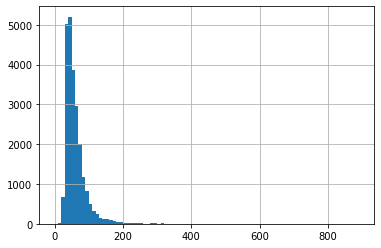

In [34]:
data["total_area"].hist(bins=range(0, 900, 10))

**Вывод**: Большая часть представленных квартир имеет площадь не более 70 м2, чаще всего встречаются значения в районе 40-50 м2. После 100 м2 количество квартир существенно падает.


In [35]:
data["living_area"].describe()

count    21752.000000
mean        34.448356
std         22.037664
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

<AxesSubplot:>

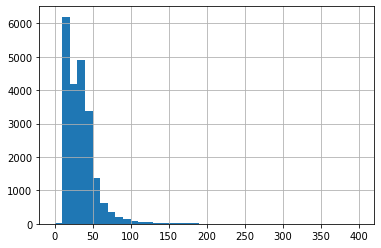

In [36]:
data["living_area"].hist(bins=range(0, round(data["living_area"].max()), 10))

**Вывод**: Не смотря на то, что медианное значение жилой площади квартиры составляет 30 м2, чаще встречаются квартиры с площадями 10-20 м2 и 30-40 м2, что представляет собой варианты, предназначенные для жизни 1 и 2 человек соответственно.


In [37]:
data["kitchen_area"].describe()

count    21381.000000
mean        10.566403
std          5.901753
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

<AxesSubplot:>

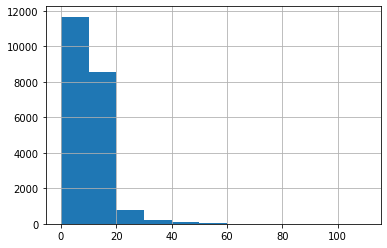

In [38]:
data["kitchen_area"].hist(bins=range(0, round(data["kitchen_area"].max()), 10))

**Вывод**: У большинства квартир кухня занимает места меньше, чем жилая зона, примерно в 2-6 раза и также зависит напрямую от общей площади квартиры.


In [39]:
data["last_price"].describe()

count    2.365000e+04
mean     6.541127e+06
std      1.089640e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

4500000.0    342
3500000.0    289
4000000.0    260
4300000.0    260
4200000.0    258
3600000.0    257
3300000.0    244
3800000.0    240
3200000.0    238
4100000.0    233
Name: last_price, dtype: int64

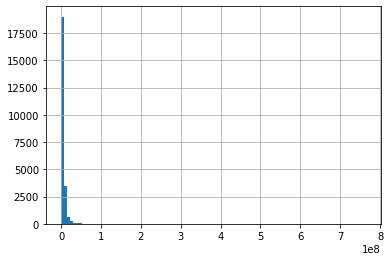

In [40]:
data["last_price"].hist(bins=100)
data["last_price"].value_counts().head(10)

**Вывод**: Большая часть цен колеблется в районе 3.5-4.5 млн. рублей, а более высокие значения характерны для больших по площади квартир с большим количеством комнат, соответственно такие варианты будут малочисленны.


In [41]:
data["rooms"].describe()

count    23650.000000
mean         2.070106
std          1.078620
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

<AxesSubplot:>

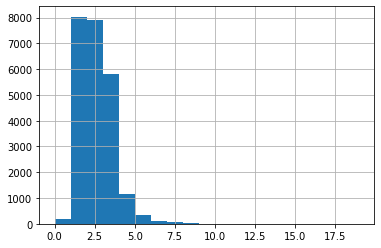

In [42]:
data["rooms"].hist(bins=range(0, 20))

**Вывод**: Чаще всего распространены 1-3 комнатные квартиры, и после этого количество квартир с большим числом комнат падает.


In [43]:
data["ceiling_height"].describe()

count    14490.000000
mean         2.728486
std          0.305870
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max         10.300000
Name: ceiling_height, dtype: float64

<AxesSubplot:>

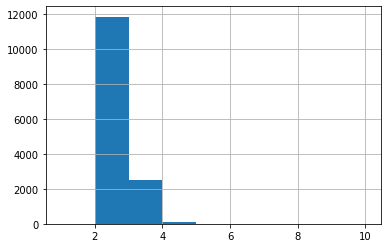

In [44]:
data["ceiling_height"].hist(bins=range(1, 11))

**Вывод**: Результаты на график в большей мере соответствуют действительности, ведь большинство потолков находятся в диапазоне от 2.65 до 3.2, как и положено по нормативным документам.


In [45]:
data["floor"].describe()

count    23650.000000
mean         5.893277
std          4.883317
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

<AxesSubplot:>

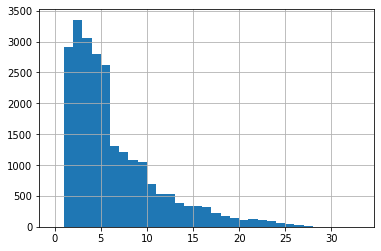

In [46]:
data["floor"].hist(bins=range(0, round(data["floor"].max() + 1)))

**Вывод**: Существенное количество квартир находятся на этаже, не превышающем 5. Вероятно это обусловлено тем, что для Санкт-Петербурга, где выставлено максимальное количество объявлений, характерно большое количество пятиэтажек.


In [47]:
data["apartment_floor_type"].describe()

count      23650
unique         3
top       другой
freq       17408
Name: apartment_floor_type, dtype: object

<AxesSubplot:>

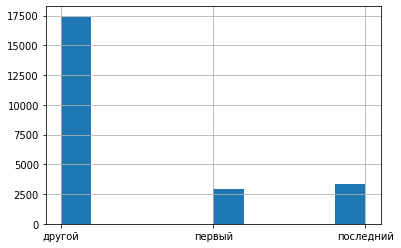

In [48]:
data["apartment_floor_type"].hist()

**Вывод**: Этот график позволяет дополнить предыдущий вывод тем, что на первом этаже представлено меньше всего квартир, затем по порядку возрастания идут квартиры на последних этажах, а затем все остальные.


In [49]:
data["floors_total"].describe()

count    23565.000000
mean        10.675875
std          6.594823
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

<AxesSubplot:>

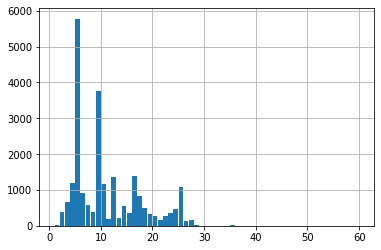

In [50]:
data["floors_total"].hist(bins=range(1, 61, 1), rwidth=0.9)

**Вывод**: Как и ожидалось, количество домов со стандартным количеством квартир (5 и 9) превалирует над всеми остальными значениями, в меньшинстве остаются квартиры, где этажей больше 30.


In [51]:
data["cityCenters_nearest"].describe()

count    18139.000000
mean     14197.860742
std       8606.830295
min        181.000000
25%       9241.000000
50%      13105.000000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

8460     61
20802    32
10720    30
8434     27
20444    27
10364    26
8370     26
4836     25
13056    23
13845    23
Name: cityCenters_nearest, dtype: Int64

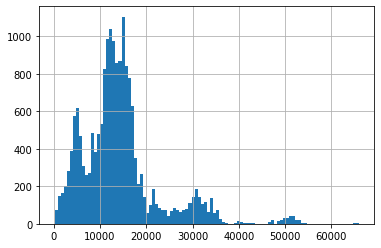

In [52]:
data["cityCenters_nearest"].hist(bins=100)
data["cityCenters_nearest"].value_counts().head(10)

**Вывод**: большая часть квартир находится на удалении от центра на 8-10, 13 и 20 км, что плохо прослеживается на гистограмме, поскольку её форма сильно зависит от числа разбиений, в данном случае результат не объективен. Данные выводы опираются на результаты применения value_counts().


In [53]:
data["airports_nearest"].describe()

count    18116.000000
mean     28803.225878
std      12637.314144
min          0.000000
25%      18575.750000
50%      26756.500000
75%      37294.000000
max      84869.000000
Name: airports_nearest, dtype: float64

37434    61
21928    32
39946    30
44870    30
37407    27
18732    27
39140    26
31744    25
37412    24
47303    23
Name: airports_nearest, dtype: Int64

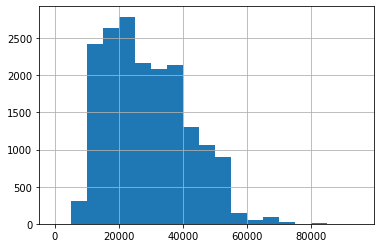

In [54]:
data["airports_nearest"].hist(bins=range(0, 100000, 5000))
data["airports_nearest"].value_counts().head(10)

**Вывод**: Большинство квартир находятся на достаточном удалении от аэропорта(от 10 км и выше), максимум в районе 20 и 35-40 км, что сложно проследить на гистограмме, поскольку её форма сильно зависит от числа разбиения.


In [55]:
data["parks_nearest"].describe()

count    8064.000000
mean      490.830729
std       342.554386
min         1.000000
25%       288.000000
50%       454.500000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

441     67
392     41
173     41
456     40
471     32
2102    30
541     29
458     29
447     28
288     28
Name: parks_nearest, dtype: Int64

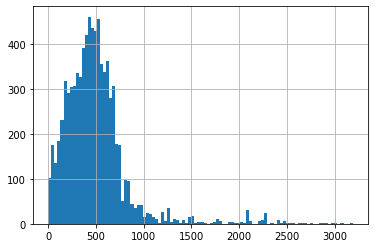

In [56]:
data["parks_nearest"].hist(bins=100)
data["parks_nearest"].value_counts().head(10)

**Вывод**: Большинство квартир имеют недалеко от себя парки(в районе 300-600 м, что относительно недалеко, в пределах нескольких улиц)


In [57]:
data["publication_day"].describe()

count    23650.000000
mean         2.568710
std          1.788808
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: publication_day, dtype: float64

<AxesSubplot:>

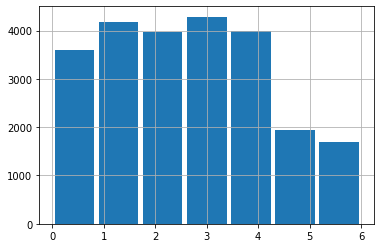

In [58]:
data["publication_day"].hist(bins=7, rwidth=0.9)

**Вывод**: В будние дни поступает больше всего объявлений, особенно в четверг и вторник, на выходных - меньше всего.


In [59]:
data["publication_month"].describe()

count    23650.000000
mean         6.401564
std          3.491418
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: publication_month, dtype: float64

<AxesSubplot:>

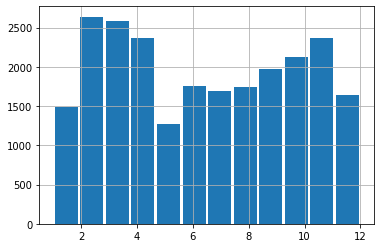

In [60]:
data["publication_month"].hist(bins=12, rwidth=0.9)

**Вывод**: Меньше всего объявлений в январе, феврале и марте, больше всего - с февраля по апрель.


**Задание**: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.

- Постройте гистограмму.
- Посчитайте среднее и медиану.


In [61]:
print(f"Медианное значение составляет {data.days_exposition.median()} дней.")
print(f"Среднее значение составляет {data.days_exposition.mean(): .2f} дней")

Медианное значение составляет 95.0 дней.
Среднее значение составляет  180.75 дней


<AxesSubplot:>

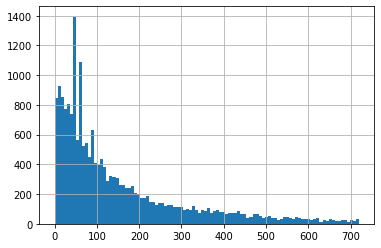

In [62]:
data.days_exposition.hist(bins=100, range=(0, 720))

In [63]:
data.days_exposition.value_counts()

45.0      879
60.0      538
7.0       234
30.0      208
90.0      203
         ... 
969.0       1
1.0         1
1147.0      1
1148.0      1
1174.0      1
Name: days_exposition, Length: 1141, dtype: int64

**Вывод**:
Медианное значение отличается от среднего практически в 2 раза, что обусловлено наличием выбросов и завышенных значений продаж в определённые дни. Квартиры чаще всего продают за первые 90 дней, причём наиболее часто это происходит примерно за 1.5, 2 месяца и за одну неделю(в этих точках наблюдается резкое увеличение продаж, возможно в эти дни оно сбрасывается или его необходимо продлять). Быстрыми можно считать продажи до 60 дней, а долгими - больше 200 дней.


**Задание**: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."

- общей площади;
- жилой площади;
- площади кухни;
- количество комнат;
- типа этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год);


Для подготовки к анализу взаимосвязей между данными выделим необходимые стоблцы с данными в отдельный список и исследуем матрицу корелляции:


In [64]:
corr_column = [
    "last_price",
    "total_area",
    "living_area",
    "kitchen_area",
    "rooms",
    "apartment_floor_type",
    "publication_day",
    "publication_month",
    "publication_year",
]
data[corr_column[:5]].corr()

,last_price,total_area,living_area,kitchen_area,rooms
last_price,1.000000,0.653743,0.566517,0.520233,0.363421
total_area,0.653743,1.000000,0.939534,0.608879,0.758745
living_area,0.566517,0.939534,1.000000,0.428773,0.846088
kitchen_area,0.520233,0.608879,0.428773,1.000000,0.270585
rooms,0.363421,0.758745,0.846088,0.270585,1.000000


Для оптимизации времени на построение и исследование графиков используем цикл, названия графиков же запишем в отдельный список:


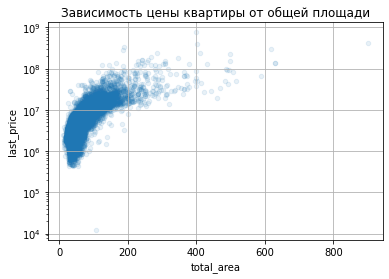

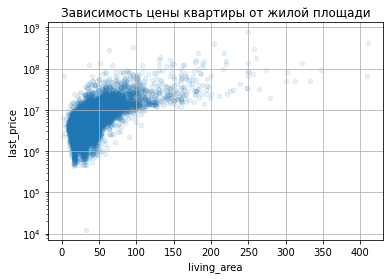

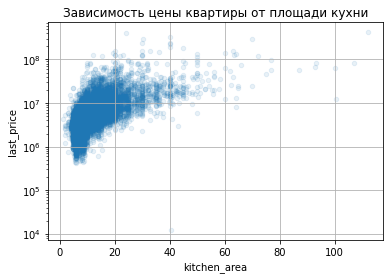

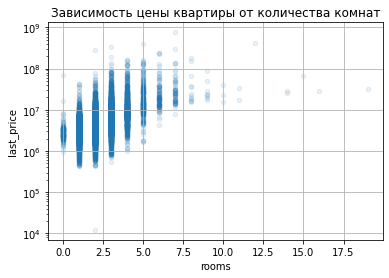

In [65]:
title_names = [
    "Зависимость цены квартиры от общей площади",
    "Зависимость цены квартиры от жилой площади",
    "Зависимость цены квартиры от площади кухни",
    "Зависимость цены квартиры от количества комнат",
    "Зависимость цены квартиры от типа этажа",
    "Зависимость цены квартиры от дня недели публикации объявления",
    "Зависимость цены квартиры от месяца публикации объявления",
    "Зависимость цены квартиры от года публикации объявления",
]
for col, name in zip(corr_column[1:], title_names[:4]):
    data.sort_values(by=col).plot(
        x=col,
        y="last_price",
        grid=True,
        kind="scatter",
        title=name,
        logy=True,
        alpha=0.1,
    )

Для категориальных переменных такой график не корректен, поэтому применим столбчатые диаграммы:


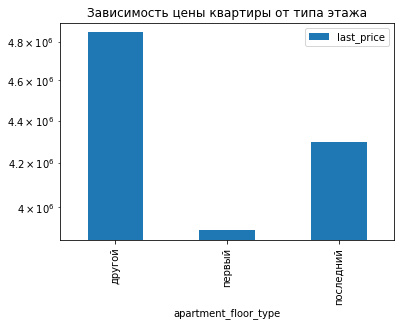

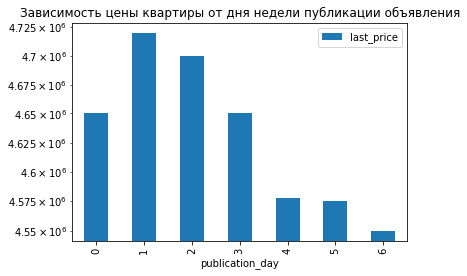

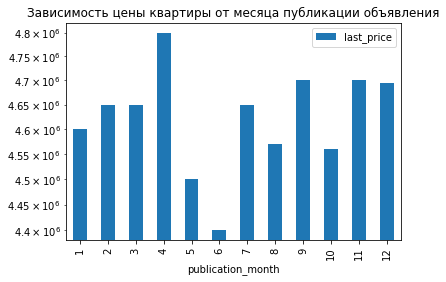

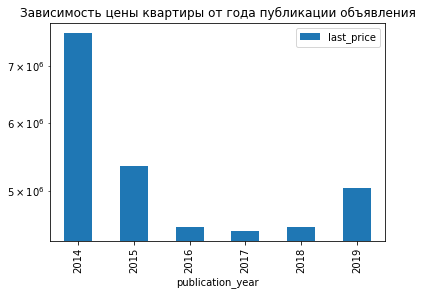

In [66]:
for col, name in zip(corr_column[5:], title_names[4:]):
    data.pivot_table(index=col, values="last_price", aggfunc="median").plot(
        kind="bar", title=name, logy=True
    )

**Вывод**:
На первых трёх графиках, где отражена зависимость между ценой квартиры и площадями частей помещения наблюдается прямая корелляция, слабая корелляция также наблюдается и в графике с числом комнат. Остальные графики были просчитаны по медианному значению цены для каждой из категорий.


Проведём подробный аналих одной из категориальных переменных, например **apartment_floor_type**, отвечающую за тип этажа:


In [67]:
data.pivot_table(
    index="apartment_floor_type",
    values="last_price",
    aggfunc=["count", "mean", "median"],
)

,count,mean,median
,last_price,last_price,last_price
apartment_floor_type,,,
другой,17408,6.675825e+06,4850000.0
первый,2912,4.800465e+06,3900000.0
последний,3330,7.359138e+06,4300000.0


По столбцу _count_ видно, что крайних этажей меньше, чем остальных, поэтому также следует проверить результаты для объединённых категорий:


In [68]:
print(
    f'Средняя цена крайних этажей {data.loc[data["apartment_floor_type"] != "другой", "last_price"].mean():.5g}'
)
print(
    f'Медианная цена крайних этажей {data.loc[data["apartment_floor_type"] != "другой", "last_price"].median():.5g}'
)

Средняя цена крайних этажей 6.1655e+06
Медианная цена крайних этажей 4.1e+06


Отсюда следует, что квартиры на первых и последних этажах обычно дешевле, чем на остальных, причём среди них самыми дешёвыми можно назвать квартиры, расположенные на первом этаже.


**Вывод**:
Согласно матрице корреляции и графикам, больше всего стоимость квартиры зависит от следующих показателей:

- **_total_area_**: кореляция составляет 0.653743;
- **_living_area_**: кореляция составляет 0.566517;
- **_kitchen_area_**: кореляция составляет 0.520233;
- **_rooms_**: кореляция составляет 0.363421.

Указанные параметры напрямую зависят друг от друга, общая площадь в большей мере, количество комнат - в меньшей мере. Остальные параметры либо не оказывают никакого влияния на цену, либо связаны с ней нелинейной зависимостью, которую на текущем этапе установить не представляется возможным.
Из оставшихся графиков получены следующие результаты:

- **_apartment_floor_type_**: на крайних этажах цены ниже, чем на других, причём сэкономить можно до 0.9 млн.
- **_publication day_**: самые высокие цены приходятся на будние дни, в то время как самые низкие приходятся на выходные и предвыходные дни недели.
- **_publication month_**: апрель, сентябрь, ноябрь и декабрь - самые невыгодные для покупки квартиры месяцы, в отличие от мая и июля, ведь в таком случае можно сэкономить до 0.3-0.4 млн. рублей.
- **_publication year_**: самая высокая цена на квартиры наблюдалась в 2014, причём она выше на 2-2.5 млн, чем в остальное время, самые дешёвые же квартиры прослеживаются в 2017 году.


**Задание**: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name."


In [69]:
all_osmc = data.pivot_table(
    index="locality_name", values="one_square_meter_cost", aggfunc=["count", "mean"]
)
top_10_osmc = all_osmc.sort_values(
    by=[("count", "one_square_meter_cost")], ascending=False
).head(10)
top_10_osmc.columns = ["Число объявлений, ед", "Цена за 1 м.кв., руб."]
top_10_osmc

,"Число объявлений, ед","Цена за 1 м.кв., руб."
locality_name,,
санкт-петербург,15721,114849.005788
мурино,590,86087.508475
кудрово,472,95324.957627
шушары,440,78677.379545
всеволожск,398,68654.474874
пушкин,369,103125.818428
колпино,338,75424.571006
парголово,327,90175.886850
гатчина,307,68746.110749


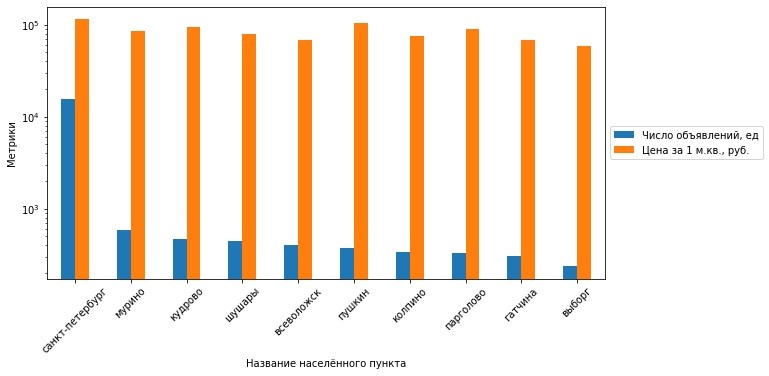

In [70]:
top_10_osmc.plot(
    kind="bar",
    logy=True,
    xlabel="Название населённого пункта",
    ylabel="Метрики",
    rot=45,
    figsize=(10, 5),
)
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

(0.0, 200000.0)

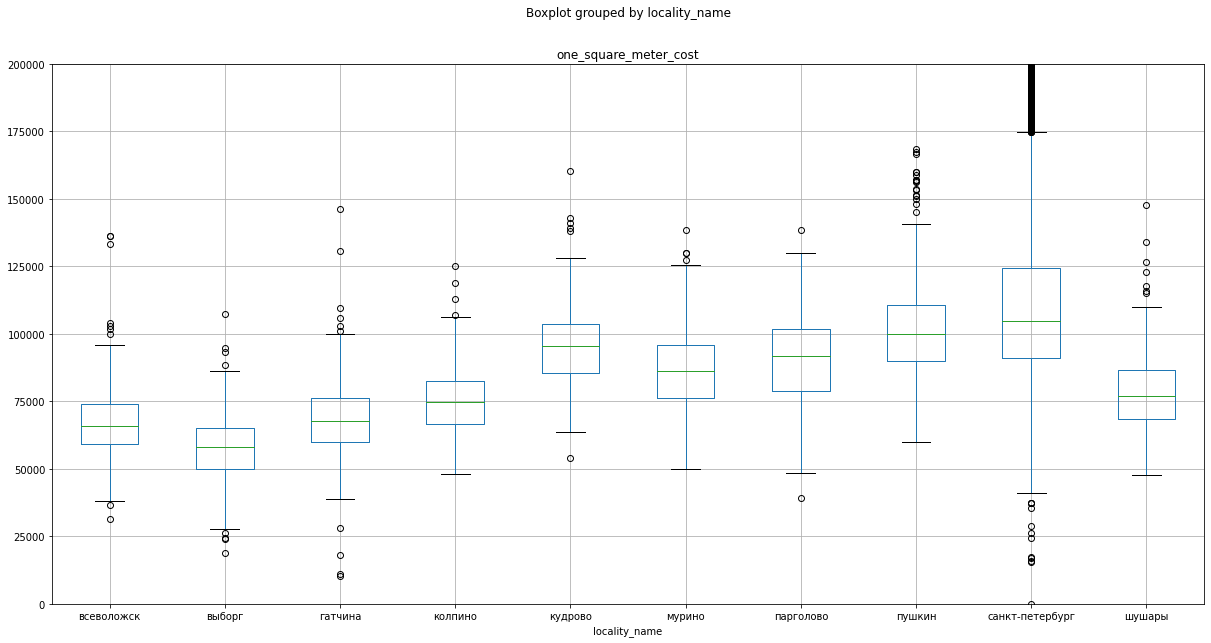

In [71]:
# Код ревьюера

ax = data.query("locality_name in @top_10_osmc.index").boxplot(
    "one_square_meter_cost", by="locality_name", figsize=(20, 10)
)
ax.set_ylim(0, 200000)

Населённые пункты с наименьшей и наибольшей стоимостью квадратного метра(среди всех значений):


In [72]:
all_osmc.loc[
    (
        all_osmc["mean"]["one_square_meter_cost"]
        == all_osmc["mean"]["one_square_meter_cost"].max()
    )
    | (
        all_osmc["mean"]["one_square_meter_cost"]
        == all_osmc["mean"]["one_square_meter_cost"].min()
    ),
    "mean",
]

,one_square_meter_cost
locality_name,
зеленогорск,115122.750000
старополье,11206.333333


**Вывод**:
Наибольшее количество объявлений наблюдается в _Санкт-Петербурге_. Самая большая удельная цена квадратного метра одной квартиры наблюдается в _Зеленогорске_, наименьшая - в _Старополье_.


**Задание**: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."


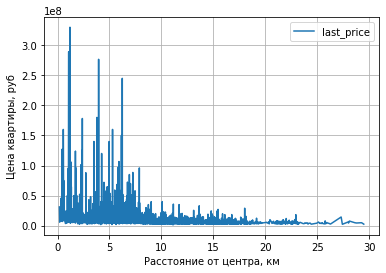

In [73]:
spb_data = data.loc[data["locality_name"] == "санкт-петербург"]
spb_data.pivot_table(index="cityCenter_distance", values="last_price").plot(
    grid=True, xlabel="Расстояние от центра, км", ylabel="Цена квартиры, руб"
)
plt.show()

**Вывод**:
Чем дальше квартира от центра города, тем меньше её стоимость, однако в диапазоне 6 км наблюдается небольшой всплеск цены.


### Общий вывод

Изучены данные объявлений о продаже недвижимости в Санкт-Петербурге и прилегающих районах, обработаны данные: исключены пропуски столбца **locality_name**, заполнены пропуски в **balcony** и **is_apartment**, исправлены аномалии в **ceiling_height**, там где требуется, изменён тип данных, обработаны явные и неявные дубликаты в столбце **locality_name**.
По результатам исследовательского анализа данных можно заключить следующее:

- Самая часто встречаемая жилая площадь порядка 17-18 и 30 м2, а кухни порядка 6-10 м2. Общая площадь чаще находится около 42 +- 3 м2, а также часто попадается 60 м2.
- В объявлениях больше всего 1-3 комнатных квартир стоимостью порядка 3.5-4.5 млн. руб., чаще продаются квартиры до 5 этажа включительно.
- Достаточно много квартир в пяти и девятиэтажках, расположенных на достаточном удалении как от центра города, так и от аэропортов. Тем не менее, зачастую в пешей доступности находится парк.
- В будние дни публикуется больше объявлений, чем в выходные. Больше всего объявлений публикуется с февраля по апрель, меньше всего объявлений в январе, декабре и мае.
- Чаще всего квартиры продаются за 45 или 60 дней, при этом более половины квартир продаются в первые 100 дней после появления объявления. Менее удачными можно считать объявления, которые продавались более 200 дней.
- Прямое влияние на стоимость квартиры больше всего оказывают следующие параметры(у в порядке убывания влияния): общая площадь, жилая площадь, площадь кухни, количество комнат. Остальные переменные влияния не оказывают или оно нелинейно.
- Наибольшей выгодой обладают объявления о продаже квартиры на первом или последнем этаже за 2017 год. Также лучше рассматривать предложения, опубликованные с пятницы по воскресенье в мае или июле.
- Максимальная удельная стоимость квадратного метра в Зеленогорске, минимальная - в Старополье.
- Чем дальше квартира находится от центра Санкт-Петербурга, тем меньше она будет стоить.

Стоит отметить, что большое количество пропусков оставлены незаполненными, поскольку они должны опираться на картографические данные, заменить которые проблематично, в то время как часть значений, определяемых продавцом можно заполнить медианными значениями, если есть возможность распределить их по каким либо категориям.


**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.


- [x] открыт файл
- [x] файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x] определены пропущенные значения
- [x] заполнены пропущенные значения там, где это возможно
- [x] есть пояснение, какие пропущенные значения обнаружены
- [x] изменены типы данных
- [x] есть пояснение, в каких столбцах изменены типы и почему
- [x] устранены неявные дубликаты в названиях населённых пунктов
- [x] устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x] посчитано и добавлено в таблицу: цена одного квадратного метра
- [x] посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x] посчитано и добавлено в таблицу: месяц публикации объявления
- [x] посчитано и добавлено в таблицу: год публикации объявления
- [x] посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x] посчитано и добавлено в таблицу: расстояние в км до центра города
- [x] изучены и описаны следующие параметры: - общая площадь; - жилая площадь; - площадь кухни; - цена объекта; - количество комнат; - высота потолков; - этаж квартиры; - тип этажа квартиры («первый», «последний», «другой»); - общее количество этажей в доме; - расстояние до центра города в метрах; - расстояние до ближайшего аэропорта; - расстояние до ближайшего парка; - день и месяц публикации объявления
- [x] построены гистограммы для каждого параметра
- [x] выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
  - Постройте гистограмму.
  - Посчитайте среднее и медиану.
  - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x] выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы." - общей площади; - жилой площади; - площади кухни; - количество комнат; - типа этажа, на котором расположена квартира (первый, последний, другой); - даты размещения (день недели, месяц, год);
- [x] выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x] выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x] в каждом этапе есть промежуточные выводы
- [x] есть общий вывод
